<a href="https://colab.research.google.com/github/ricardorocha86/Python-para-Machine-Learning/blob/master/Python_para_ML_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![texto alternativo](https://raw.githubusercontent.com/ricardorocha86/Python-para-Machine-Learning/master/Imagens/capa%20-%20python%20para%20ml%2011.jpg)

# **Python para Machine Learning** - Parte 11

Nesse notebook vamos ver:
- Análise exploratória de dados do Titanic
- Testando uma predição baseado numa heurística básica
- Pré-processamento dos dados
- Testando modelos
- Submetendo a solução no Kaggle
- Considerações importantes
- Exercícios
- Links Úteis



---



## **Análise exploratória de dados do Titanic (rápida)**

**Objetivos:**

- Entender a natureza dos dados
- Verificar quais variáveis vão me ajudar e quais não vão (e que possivelmente possam ser descartadas)
- Preparar uma solução básica via heurística


### Carregando os dados

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
url1 = 'https://raw.githubusercontent.com/ricardorocha86/Datasets/master/Titanic/train.csv'
url2 = 'https://raw.githubusercontent.com/ricardorocha86/Datasets/master/Titanic/test.csv'
titanic = pd.read_csv(url1)
teste = pd.read_csv(url2) 

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
teste.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Explorando os Dados

In [ ]:
!pip install sweetviz

In [ ]:
import sweetviz 

In [ ]:
eda_titanic = sweetviz.analyze(titanic)
eda_titanic.show_html() 

:FEATURES DONE:                    |█████████████████████| [100%]   00:03  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!
Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


In [ ]:
eda_teste = sweetviz.analyze(teste)
eda_teste.show_html() 

:FEATURES DONE:                    |█████████████████████| [100%]   00:03  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!
Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


In [ ]:
eda2 = sweetviz.compare_intra(titanic, titanic['Survived'] == 0, ['Vítima', 'Sobrevivente'])
eda2.show_html()

:FEATURES DONE:                    |█████████████████████| [100%]   00:04  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!
Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.




---



## **Testando uma predição baseado numa heurística básica**

In [ ]:
teste1 = titanic['Sex'].map({'male': 0, 'female': 1})

In [ ]:
(teste1 == titanic['Survived']).mean()

0.7867564534231201



---



## **Pré-processamento dos dados**

Precisamos escolher quais variáveis utilizar, e deixá-las todas em formato numérico, deixando assim apropriado para utilizar os modelos de Machine Learning

Vamos descartar as seguintes variáveis:

- PassengerID: é apenas o ID do usuário, não nenhuma informação nela.
- Nome: que informação pode estar contida no nome de uma pessoa?
- Ticket: pelo que vimos, é apenas um número associado ao ticket, sem um padrão muito bem definido.
- Cabin: pelo fato de que há muito missing data nessa variável.

In [ ]:
# lista dos datasets no quais devemos fazer modificações
datasets = [titanic, teste]

In [ ]:
# dropando as variaveis de interesse em cada conjunto de dados
for dataset in datasets:
    dataset.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [ ]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Preenchendo as variáveis com missing data

In [ ]:
titanic.isnull().mean()

Survived    0.000000
Pclass      0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Embarked    0.002245
dtype: float64

In [ ]:
teste.isnull().mean()

Pclass      0.000000
Sex         0.000000
Age         0.205742
SibSp       0.000000
Parch       0.000000
Fare        0.002392
Embarked    0.000000
dtype: float64

In [ ]:
med_age = titanic['Age'].median()
med_fare = titanic['Fare'].median()
moda_emb = titanic['Embarked'].mode()[0]

for dataset in datasets:
    dataset['Age'] = dataset['Age'].fillna(med_age)
    dataset['Fare'] = dataset['Fare'].fillna(med_fare)
    dataset['Embarked'] = dataset['Embarked'].fillna(moda_emb)

In [ ]:
titanic.isnull().mean()

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64

In [ ]:
teste.isnull().mean()

Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64

Trocando a variável Sex por valores binários:

In [ ]:
for dataset in datasets:
    dataset['Sex'] = dataset['Sex'].map({'male': 0, 'female': 1})

In [ ]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [ ]:
pd.get_dummies(titanic['Embarked'], drop_first=True)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


E fazer a "dummyficação" da variável Embarked

In [ ]:
# for dataset in datasets:
    # dataset = pd.get_dummies(dataset, columns = ['Embarked'], drop_first = True)

In [ ]:
titanic = pd.get_dummies(titanic, columns = ['Embarked'], drop_first = True)
teste = pd.get_dummies(teste, columns = ['Embarked'], drop_first = True)

In [ ]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,1,38.0,1,0,71.2833,0,0
2,1,3,1,26.0,0,0,7.9250,0,1
3,1,1,1,35.0,1,0,53.1000,0,1
4,0,3,0,35.0,0,0,8.0500,0,1


In [ ]:
teste.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,0,34.5,0,0,7.8292,1,0
1,3,1,47.0,1,0,7.0000,0,1
2,2,0,62.0,0,0,9.6875,1,0
3,3,0,27.0,0,0,8.6625,0,1
4,3,1,22.0,1,1,12.2875,0,1


E, para finalizar, vamos padronizar as variáveis contínuas.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
aux0 = sc.fit_transform(titanic[['Age', 'Fare']])
aux1 = pd.DataFrame(aux0, columns = ['Idade', 'Tarifa'])
titanic = pd.concat([titanic, aux1], axis = 1)
titanic.drop(['Age', 'Fare'], axis = 1, inplace = True) 

In [ ]:
aux0 = sc.transform(teste[['Age', 'Fare']])
aux1 = pd.DataFrame(aux0, columns = ['Idade', 'Tarifa'])
teste = pd.concat([teste, aux1], axis = 1)
teste.drop(['Age', 'Fare'], axis = 1, inplace = True) 

In [ ]:
titanic.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked_Q,Embarked_S,Idade,Tarifa
0,0,3,0,1,0,0,1,-0.565736,-0.502445
1,1,1,1,1,0,0,0,0.663861,0.786845
2,1,3,1,0,0,0,1,-0.258337,-0.488854
3,1,1,1,1,0,0,1,0.433312,0.420730
4,0,3,0,0,0,0,1,0.433312,-0.486337


### Essa é a preparação mais básica desse conjunto de dados para utilização de métodos de Machine Learning. Chamaremos esse pré-processamento de **CENÁRIO 1** (Mas e a variável **Pclass**?)



---



## **Testando modelos**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
# separando as variáveis explicativas da variavel resposta

X = titanic.drop('Survived', axis = 1)
Y = titanic['Survived']

In [ ]:
# validação cruzada Leave One Out
kf = KFold(n_splits = 20, shuffle = True)

### Regressão Logística 

In [ ]:
# verificando a performance da Regressão Logística

modelo = LogisticRegression()
accs_vc = cross_val_score(modelo, X, Y, cv = kf, scoring = 'accuracy')
 
print('Acurácia: {:.2f}%'.format(100*accs_vc.mean()))

Acurácia: 79.27%


### KNN - Qual o melhor K?

In [ ]:
# verificando a performance do KNN para um dado valor de K

modelo = KNeighborsClassifier(n_neighbors = 29)
accs_vc = cross_val_score(modelo, X, Y, cv = kf, scoring = 'accuracy')
 
print('Acurácia: {:.2f}%'.format(100*accs_vc.mean()))

Acurácia: 81.92%


In [ ]:
# Encontrando o melhor valor de K através de Validação Cruzada K-FOLD Leave-One-Out

from sklearn.model_selection import GridSearchCV

valores = np.arange(1, 60, 2)
parametros = {'n_neighbors': valores}

clf = GridSearchCV(KNeighborsClassifier(), param_grid = parametros, cv = kf, scoring = 'accuracy')
clf.fit(X, Y)

GridSearchCV(cv=KFold(n_splits=20, random_state=None, shuffle=True),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
# melhor escolha de K

clf.best_params_

{'n_neighbors': 29}

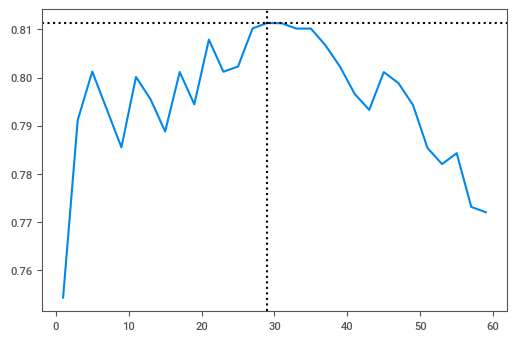

In [ ]:
# gráfico de todos as acurácias obtidas no GridSearch

import matplotlib.pyplot as plt

accs = clf.cv_results_['mean_test_score']
melhor = clf.best_params_.get('n_neighbors')

plt.plot(k, accs)
plt.axhline(max(accs), color = 'black', linestyle = 'dotted')
plt.axvline(melhor, color = 'black', linestyle = 'dotted')
plt.show()

### Árvore de Decisão - Qual o tamanho de árvore ideal?

In [ ]:
# verificando a performance do KNN para um dado valor de K

modelo = DecisionTreeClassifier(max_depth = 7)
accs_vc = cross_val_score(modelo, X, Y, cv = kf, scoring = 'accuracy')
 
print('Acurácia: {:.2f}%'.format(100*accs_vc.mean()))

Acurácia: 81.81%


In [ ]:
# Encontrando o melhor valor do 'max_depth' através de Validação Cruzada K-FOLD Leave-One-Out

from sklearn.model_selection import GridSearchCV

valores = np.arange(2, 21, 1)
parametros = {'max_depth': valores}

clf = GridSearchCV(DecisionTreeClassifier(), param_grid = parametros, cv = kf, scoring = 'accuracy')
clf.fit(X, Y)

GridSearchCV(cv=KFold(n_splits=20, random_state=None, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             pa

In [ ]:
# melhor escolha do max_depth

clf.best_params_

{'max_depth': 7}

In [ ]:
clf.cv_results_['mean_test_score']

array([0.75747475, 0.8214899 , 0.8169697 , 0.8170202 , 0.81482323,
       0.82156566, 0.81818182, 0.81926768, 0.80348485, 0.80909091,
       0.81371212, 0.79681818, 0.79005051, 0.78560606, 0.79113636,
       0.78891414, 0.7855303 , 0.78444444, 0.7854798 ])

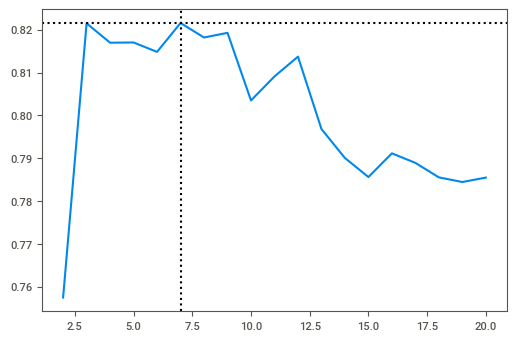

In [ ]:
# gráfico de todos as acurácias obtidas no GridSearch

import matplotlib.pyplot as plt

accs = clf.cv_results_['mean_test_score']
melhor = clf.best_params_.get('max_depth')

plt.plot(valores, accs)
plt.axhline(max(accs), color = 'black', linestyle = 'dotted')
plt.axvline(melhor, color = 'black', linestyle = 'dotted')
plt.show()

### Random Forests - Qual o tamanho ideal das árvores?

In [ ]:
# verificando a performance do KNN para um dado valor de K

modelo = RandomForestClassifier(max_depth = 10)
accs_vc = cross_val_score(modelo, X, Y, cv = 10, scoring = 'accuracy')
 
print('Acurácia: {:.2f}%'.format(100*accs_vc.mean()))

Acurácia: 82.39%


In [ ]:
# Encontrando o melhor valor do 'max_depth' através de Validação Cruzada K-FOLD Leave-One-Out

from sklearn.model_selection import GridSearchCV

valores = np.arange(2, 21, 2)
parametros = {'max_depth': valores}

clf = GridSearchCV(RandomForestClassifier(), param_grid = parametros, cv = kf, scoring = 'accuracy')
clf.fit(X, Y)

GridSearchCV(cv=KFold(n_splits=20, random_state=None, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_s

In [ ]:
# melhor escolha do max_depth

clf.best_params_

{'max_depth': 10}

In [ ]:
clf.cv_results_['mean_test_score']

array([0.79916667, 0.82257576, 0.82032828, 0.83272727, 0.82719697,
       0.82944444, 0.82383838, 0.82383838, 0.8114899 , 0.81146465])

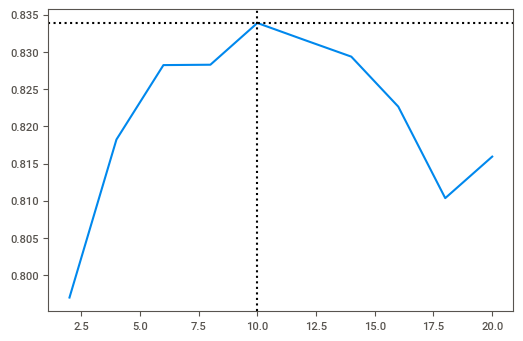

In [ ]:
# gráfico de todos as acurácias obtidas no GridSearch

import matplotlib.pyplot as plt

accs = clf.cv_results_['mean_test_score']
melhor = clf.best_params_.get('max_depth')

plt.plot(valores, accs)
plt.axhline(max(accs), color = 'black', linestyle = 'dotted')
plt.axvline(melhor, color = 'black', linestyle = 'dotted')
plt.show()



---



## **Submetendo a solução no Kaggle**

### Preparando o arquivo de submissão

In [ ]:
# modelo Random Forest com max_depth = 8

modelo = RandomForestClassifier(max_depth = 10)
modelo.fit(X, Y)
pred = modelo.predict(teste)


url = 'https://raw.githubusercontent.com/ricardorocha86/Datasets/master/Titanic/test.csv' 
subm = pd.read_csv(url, usecols = ['PassengerId'] )  
subm['Survived'] = pred

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [ ]:

subm.to_csv('minhasubmissao.csv', index = False)  


In [ ]:
# modelo mulheres sobrevivem

url = 'https://raw.githubusercontent.com/ricardorocha86/Datasets/master/Titanic/test.csv' 
subm = pd.read_csv(url, usecols = ['PassengerId'] )  
subm['Survived'] = teste1
subm.to_csv('minhasub_mulheres.csv', index = False)  

In [ ]:
# modelo KNN k = 31

url = 'https://raw.githubusercontent.com/ricardorocha86/Datasets/master/Titanic/test.csv' 
subm = pd.read_csv(url, usecols = ['PassengerId'] )  

modelo = KNeighborsClassifier(n_neighbors = 31)
modelo.fit(X, Y)
pred = modelo.predict(teste)

subm['Survived'] = pred
subm.to_csv('minhasub_knn.csv', index = False)  



---



## **Considerações importantes**

Note que nós dropamos algumas variáveis no começo da análise, e que não necessariamente seria interessante deixar de fora. Vamos dar uma segunda olhada na variável 'Name' do conjunto de dados.

In [ ]:
url = 'https://raw.githubusercontent.com/ricardorocha86/Datasets/master/Titanic/train.csv' 
nome = pd.read_csv(url, usecols = ['Name'] )  
nome.head(10)

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
5,"Moran, Mr. James"
6,"McCarthy, Mr. Timothy J"
7,"Palsson, Master. Gosta Leonard"
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"
9,"Nasser, Mrs. Nicholas (Adele Achem)"


Veja que há um padrão no formato dos nomes: é sempre o sobrenome, seguido de uma vírgula, depois a **titulação da pessoa**, e em seguida vem o primeiro nome. A titulação da pessoa pode ser uma variável preditora importante nesse problema. Vamos transformar essa variável em algo mais tratável:

In [ ]:
nome.iloc[0,0].split(', ')[1].split('. ')[0]

'Mr'

In [ ]:
titulacao = []
for i in range(nome.shape[0]):
    titulacao.append(nome.iloc[i,0].split(', ')[1].split('. ')[0])

In [ ]:
titulacao

In [ ]:
titanic['Titulo'] = titulacao

In [ ]:
titanic.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked_Q,Embarked_S,Idade,Tarifa,Titulo
0,0,3,0,1,0,0,1,-0.565736,-0.502445,Mr
1,1,1,1,1,0,0,0,0.663861,0.786845,Mrs
2,1,3,1,0,0,0,1,-0.258337,-0.488854,Miss
3,1,1,1,1,0,0,1,0.433312,0.420730,Mrs
4,0,3,0,0,0,0,1,0.433312,-0.486337,Mr




---



In [ ]:
titanic['Survived'].groupby(titanic['Titulo']).describe().sort_values(by = 'count', ascending = False)

,count,mean,std,min,25%,50%,75%,max
Titulo,,,,,,,,
Mr,517.0,0.156673,0.363844,0.0,0.00,0.0,0.00,1.0
Miss,182.0,0.697802,0.460477,0.0,0.00,1.0,1.00,1.0
Mrs,125.0,0.792000,0.407510,0.0,1.00,1.0,1.00,1.0
Master,40.0,0.575000,0.500641,0.0,0.00,1.0,1.00,1.0
Dr,7.0,0.428571,0.534522,0.0,0.00,0.0,1.00,1.0
Rev,6.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
Major,2.0,0.500000,0.707107,0.0,0.25,0.5,0.75,1.0
Col,2.0,0.500000,0.707107,0.0,0.25,0.5,0.75,1.0
Mlle,2.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0


In [ ]:
tt = []
for i in range(nome.shape[0]):
    if titulacao[i] in ['Mr', 'Miss', 'Mrs', 'Master']:
        tt.append(titulacao[i])
    else:
        tt.append('Outros')

In [ ]:
titanic['Titulo'] = tt

In [ ]:
titanic['Survived'].groupby(titanic['Titulo']).describe().sort_values(by = 'count', ascending = False)

,count,mean,std,min,25%,50%,75%,max
Titulo,,,,,,,,
Mr,517.0,0.156673,0.363844,0.0,0.0,0.0,0.0,1.0
Miss,182.0,0.697802,0.460477,0.0,0.0,1.0,1.0,1.0
Mrs,125.0,0.792000,0.407510,0.0,1.0,1.0,1.0,1.0
Master,40.0,0.575000,0.500641,0.0,0.0,1.0,1.0,1.0
Outros,27.0,0.444444,0.506370,0.0,0.0,0.0,1.0,1.0


Repetindo o procedimento para a amostra de teste

In [ ]:
url = 'https://raw.githubusercontent.com/ricardorocha86/Datasets/master/Titanic/test.csv' 
nome = pd.read_csv(url, usecols = ['Name'] )   

titulacao = []
for i in range(nome.shape[0]):
    titulacao.append(nome.iloc[i,0].split(', ')[1].split('. ')[0])

tt = []
for i in range(nome.shape[0]):
    if titulacao[i] in ['Mr', 'Miss', 'Mrs', 'Master']:
        tt.append(titulacao[i])
    else:
        tt.append('Outros')

teste['Titulo'] = tt

In [ ]:
teste['Sex'].groupby(teste['Titulo']).describe().sort_values(by = 'count', ascending = False)

,count,mean,std,min,25%,50%,75%,max
Titulo,,,,,,,,
Mr,240.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
Miss,78.0,1.000000,0.00000,1.0,1.0,1.0,1.0,1.0
Mrs,72.0,1.000000,0.00000,1.0,1.0,1.0,1.0,1.0
Master,21.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
Outros,7.0,0.285714,0.48795,0.0,0.0,0.0,0.5,1.0




---



## **Exercício 20**

a) Construa um cenário 2, utilizando adicionalmente a nova variável criada com a titulação das pessoas.

b) Construa um cenário 3, fazendo discretização das variáveis continuas em seus respectivos quartis.

c) Construa um cenário 4, implemente suas próprias ideias! (dica: crie uma nova variável que indique se a pessoa tem parentes a bordo ou não, use a função KNNImputer para fazer o preenchimento dos dados faltantes, estudo o desempenho utilizando subgrupos de variáveis...)

d) Explore os outros métodos que você conhece de combinação de modelos e ideias de pré-processamento.

## **Links Úteis**

- [Documentação Sweetviz](https://pypi.org/project/sweetviz/)
- [Titanic no Kaggle](https://www.kaggle.com/c/titanic)